Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import math
from deepchecks.tabular.datasets.classification import adult 
from deepchecks.tabular.checks.data_integrity import FeatureFeatureCorrelation 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVC, LinearSVC, SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import cross_val_score


C:\Users\Saumya\AppData\Local\Temp\ipykernel_31472\3342012555.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
deepchecks - WARNING - You are using deepchecks version 0.14.0, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


Load the dataset

In [2]:
data=pd.read_csv('data_car.csv')

In [3]:
# to show full columns
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
#change the column names
new_column_names = {'Engine Fuel Type':'Engine_Fuel_Type','Engine HP':'Engine_HP','Engine Cylinders':'Engine_Cylinders','Transmission Type':'Transmission_Type','Number of Doors':'Number_of_Doors','Market Category':'Market_Category','Vehicle Size':'Vehicle_Size','Vehicle Style':'Vehicle_Style','highway MPG':'highway_MPG','city mpg':'city_mpg'}
data.rename(columns=new_column_names, inplace=True)

In [7]:
data.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
#continuous columns-Engine_HP,Engine_Cylinders,Number_of_Doors
#categorical-Make,Model,Engine_Fuel_Type,Transmission_Type,Driven_Wheels,Market_Category,Vehicle_Size,Vehicle_Style

In [9]:
data["Year"].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

In [10]:
data["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [11]:
data["Engine_Fuel_Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [12]:
data["Engine_Cylinders"].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [13]:
data["Transmission_Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [14]:
data["Number_of_Doors"].unique()

array([ 2.,  4.,  3., nan])

In [15]:
data['Vehicle_Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [16]:
data.shape

(11914, 16)

In [17]:
#to check the null values
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [18]:
# To replace null values -Engine HP,Engine Cylinders,Market Category,Engine Fuel Type,Number of Doors
data['Engine_HP']=data['Engine_HP'].fillna(data['Engine_HP'].median())
data['Engine_Cylinders']=data['Engine_Cylinders'].fillna(data['Engine_Cylinders'].median())
data['Market_Category']=data['Market_Category'].fillna(data['Market_Category'].mode()[0])
data['Engine_Fuel_Type']=data['Engine_Fuel_Type'].fillna(data['Engine_Fuel_Type'].mode()[0])
data['Number_of_Doors']=data['Number_of_Doors'].fillna(data['Number_of_Doors'].median())

In [19]:
#statistics of data
data.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.256421,5.629763,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.888444,1.778413,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [20]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine_Fuel_Type       10
Engine_HP             356
Engine_Cylinders        9
Transmission_Type       5
Driven_Wheels           4
Number_of_Doors         3
Market_Category        71
Vehicle_Size            3
Vehicle_Style          16
highway_MPG            59
city_mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [21]:
data.MSRP.value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: MSRP, Length: 6049, dtype: int64

<Axes: ylabel='Type'>

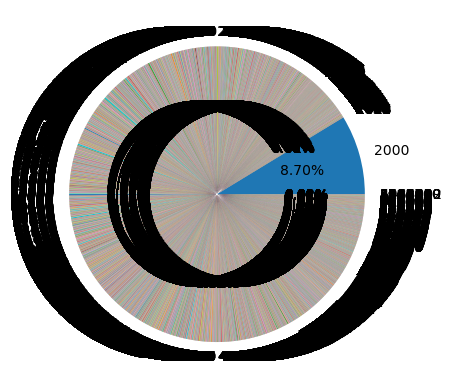

In [22]:
data.groupby('MSRP').size().plot(kind='pie',y ='MSRP',label='Type',autopct='%1.2f%%')

In [23]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

###### univariate analysis of categorical columns


<Axes: xlabel='Vehicle_Size', ylabel='count'>

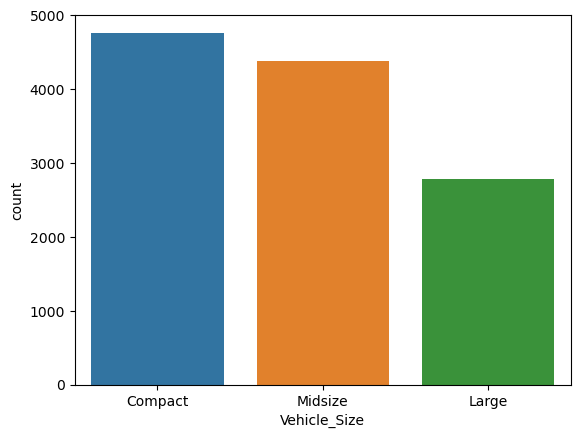

In [24]:
sns.countplot(x=data["Vehicle_Size"])

<Axes: xlabel='count', ylabel='Engine_Fuel_Type'>

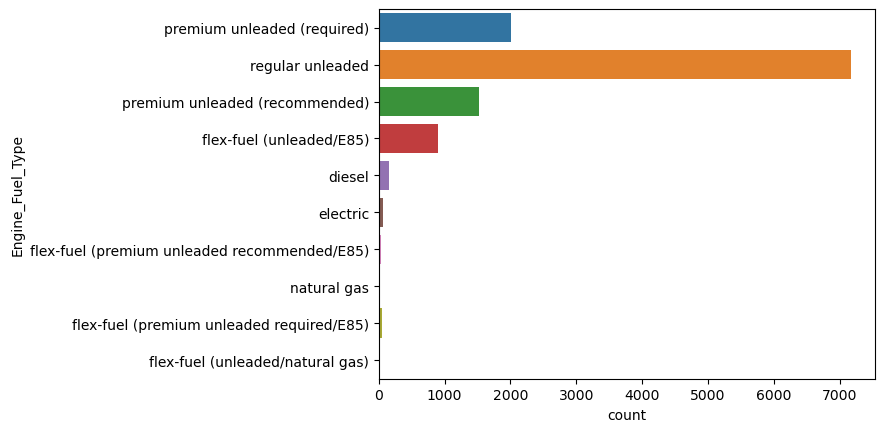

In [25]:
sns.countplot(data=data,y="Engine_Fuel_Type")

<Axes: xlabel='count', ylabel='Vehicle_Style'>

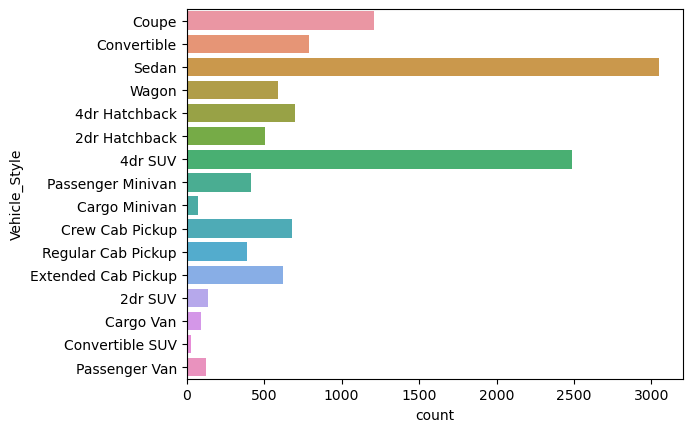

In [26]:
sns.countplot(data=data,y="Vehicle_Style")

<Axes: xlabel='count', ylabel='Transmission_Type'>

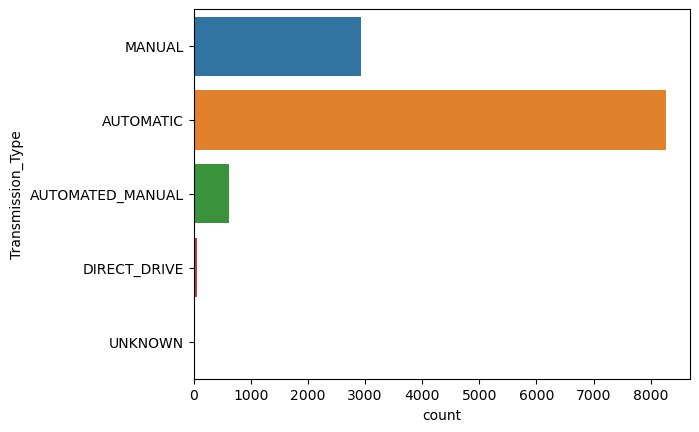

In [27]:
sns.countplot(data=data,y="Transmission_Type")

<Axes: xlabel='count', ylabel='Driven_Wheels'>

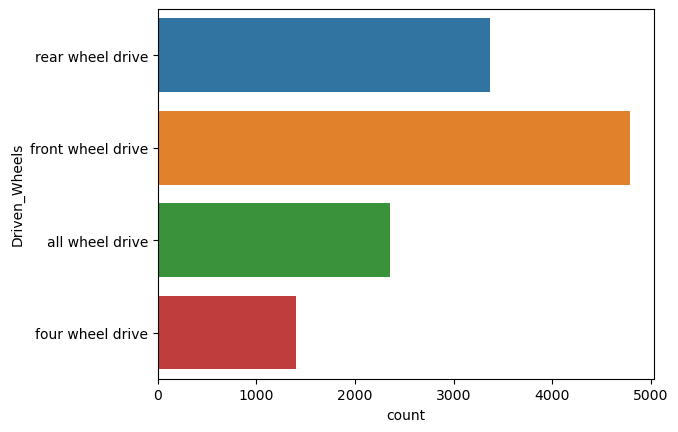

In [28]:
sns.countplot(data=data,y="Driven_Wheels") 

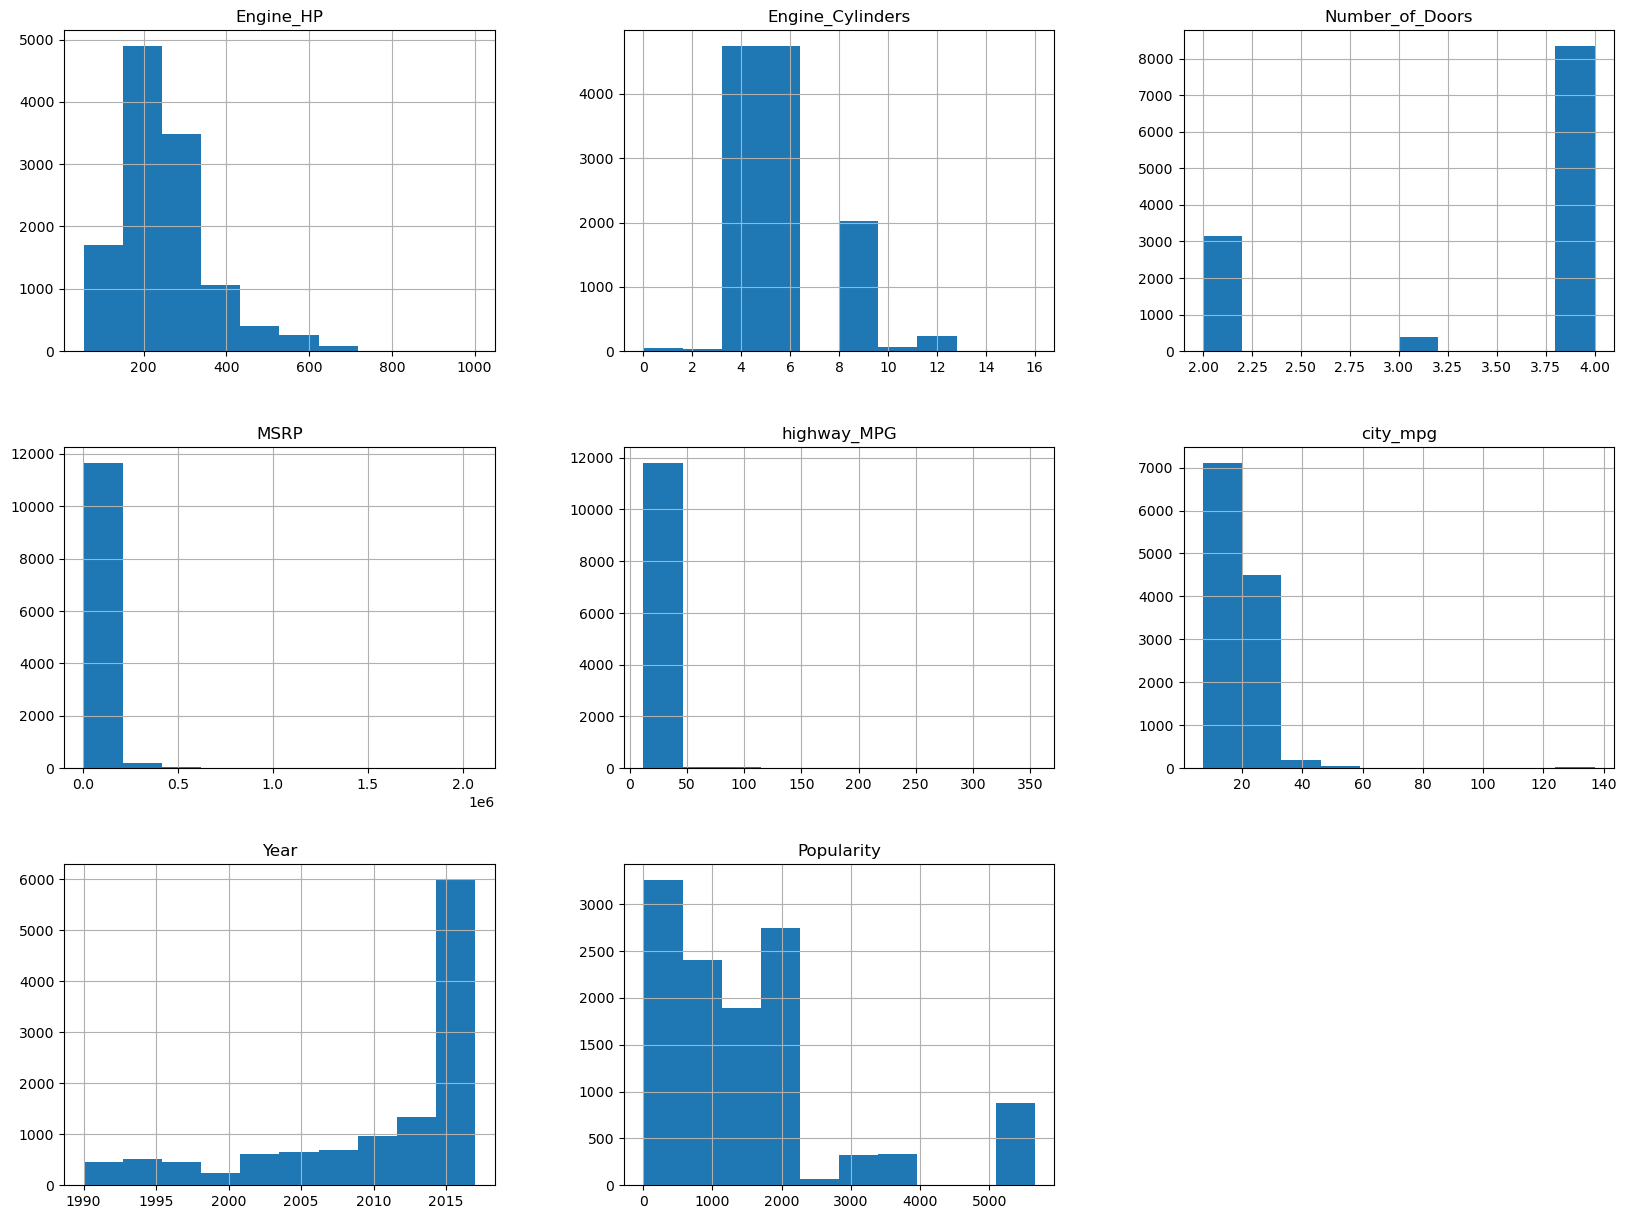

In [29]:
#univariate analysis of numerical columns 
data[['Engine_HP','Engine_Cylinders','Number_of_Doors','MSRP','highway_MPG','city_mpg','Year','Popularity']].hist(figsize=(20,15))
plt.show()

In [30]:
#sns.countplot(data=data, x="Driven_Wheels", hue="MSRP")

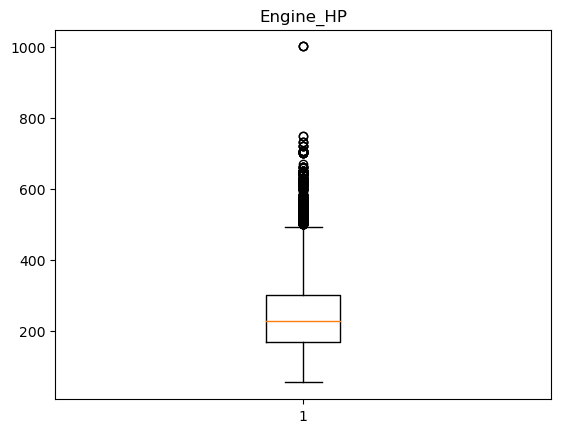

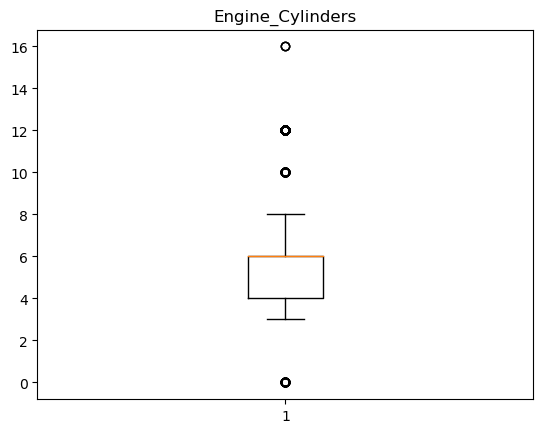

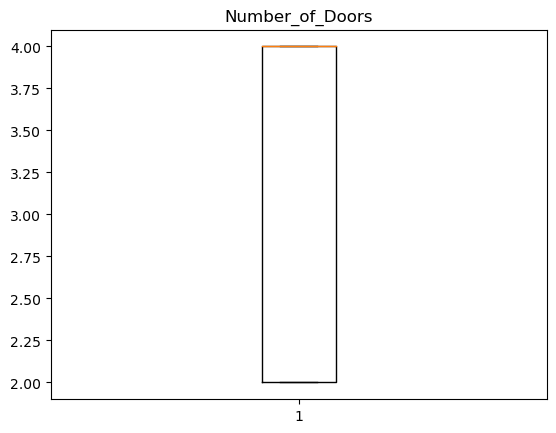

In [31]:
#Boxplot for continuous numerical column
for i in ['Engine_HP','Engine_Cylinders','Number_of_Doors']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [32]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

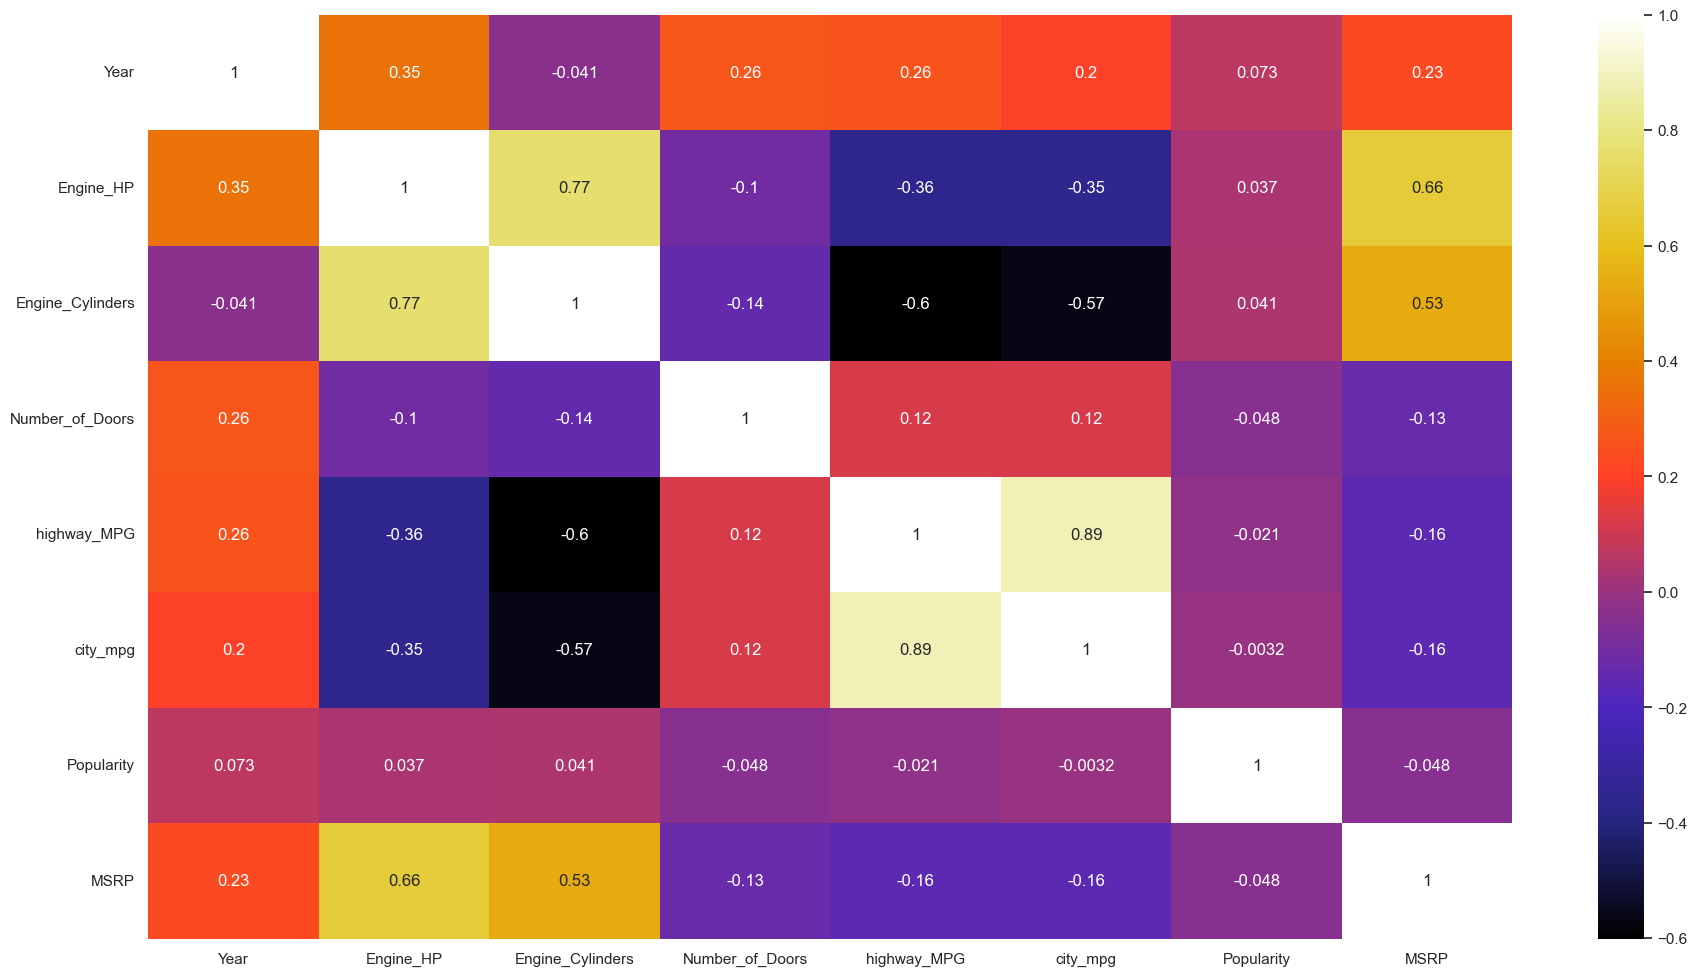

In [33]:
#Bivariate analysis 
#Correlation plot using heatmap
def plot_corr(data):
    corr = data.corr()
    sns.set_theme()
    plt.figure(figsize = (22,12))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(data)

Data Preprocessing

In [34]:
#To remove all the duplicates

data.drop_duplicates(inplace=True, keep='first')

In [35]:
data.shape

(11199, 16)

In [36]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [37]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [38]:
data.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [39]:
#engine hp,engine cylinder continous variables-removal of outliers

In [40]:
Q1 = data.Engine_HP.quantile(0.25)
Q3 = data.Engine_HP.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-24.5 499.5 131.0


In [41]:
data.loc[data.Engine_HP<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [42]:
data.loc[data.Engine_HP > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,BMW,X5 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11510,BMW,X5 M,2017,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11523,BMW,X6 M,2015,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102100
11524,BMW,X6 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102200


In [43]:
data.loc[data['Engine_HP']<min_limit,'Engine_HP']=np.median(data.Engine_HP)
data.loc[data['Engine_HP']>max_limit,'Engine_HP']=np.median(data.Engine_HP)
data.loc[data.Engine_HP<min_limit]
data.loc[data.Engine_HP > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [44]:
Q1 = data.Engine_Cylinders.quantile(0.25)
Q3 = data.Engine_Cylinders.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

1.0 9.0 2.0


In [45]:
data.loc[data.Engine_Cylinders<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
4705,Honda,Fit EV,2013,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4785,Ford,Focus,2015,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,227.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


In [46]:
data.loc[data.Engine_Cylinders > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
460,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,223970
461,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,219775
462,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
463,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,224585
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,13,259,208295
11395,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,13,259,223295
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),236.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),236.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025


In [47]:
data.loc[data['Engine_Cylinders']<min_limit,'Engine_Cylinders']=np.median(data.Engine_Cylinders)
data.loc[data['Engine_Cylinders']>max_limit,'Engine_Cylinders']=np.median(data.Engine_Cylinders)
data.loc[data.Engine_Cylinders<min_limit]
data.loc[data.Engine_Cylinders > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [48]:
#Encoding
le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le1.fit_transform(data['Model'])
data['Engine_Fuel_Type']=le2.fit_transform(data['Engine_Fuel_Type'])
data['Transmission_Type']=le3.fit_transform(data['Transmission_Type'])
data['Driven_Wheels']=le4.fit_transform(data['Driven_Wheels'])
data['Market_Category']=le5.fit_transform(data['Market_Category'])
data['Vehicle_Size']=le6.fit_transform(data['Vehicle_Size'])
data['Vehicle_Style']=le7.fit_transform(data['Vehicle_Style'])

In [49]:
#Splitting the data into independent and dependent variables
X=data.drop(['MSRP'],axis=1)
y=data['MSRP']

In [50]:
X

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11910,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11911,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11912,0,901,2013,7,300.0,6.0,1,0,4.0,13,2,2,23,16,204


In [51]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11199, dtype: int64

Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
numeric_features = []

for col in X.columns:
    if(X[col].dtype == "float" ):
        numeric_features.append(col)

X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity
0,4,1,2011,8,1.151867,0.311695,3,3,-1.666447,38,0,8,26,19,3916
1,4,0,2011,8,0.735768,0.311695,3,3,-1.666447,67,0,6,28,19,3916
2,4,0,2011,8,0.735768,0.311695,3,3,-1.666447,64,0,8,28,20,3916
3,4,0,2011,8,-0.096429,0.311695,3,3,-1.666447,67,0,8,28,18,3916
4,4,0,2011,8,-0.096429,0.311695,3,3,-1.666447,63,0,6,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,0.735768,0.311695,1,0,0.625122,13,2,2,23,16,204
11910,0,901,2012,8,0.735768,0.311695,1,0,0.625122,13,2,2,23,16,204
11911,0,901,2012,8,0.735768,0.311695,1,0,0.625122,13,2,2,23,16,204
11912,0,901,2013,7,0.735768,0.311695,1,0,0.625122,13,2,2,23,16,204


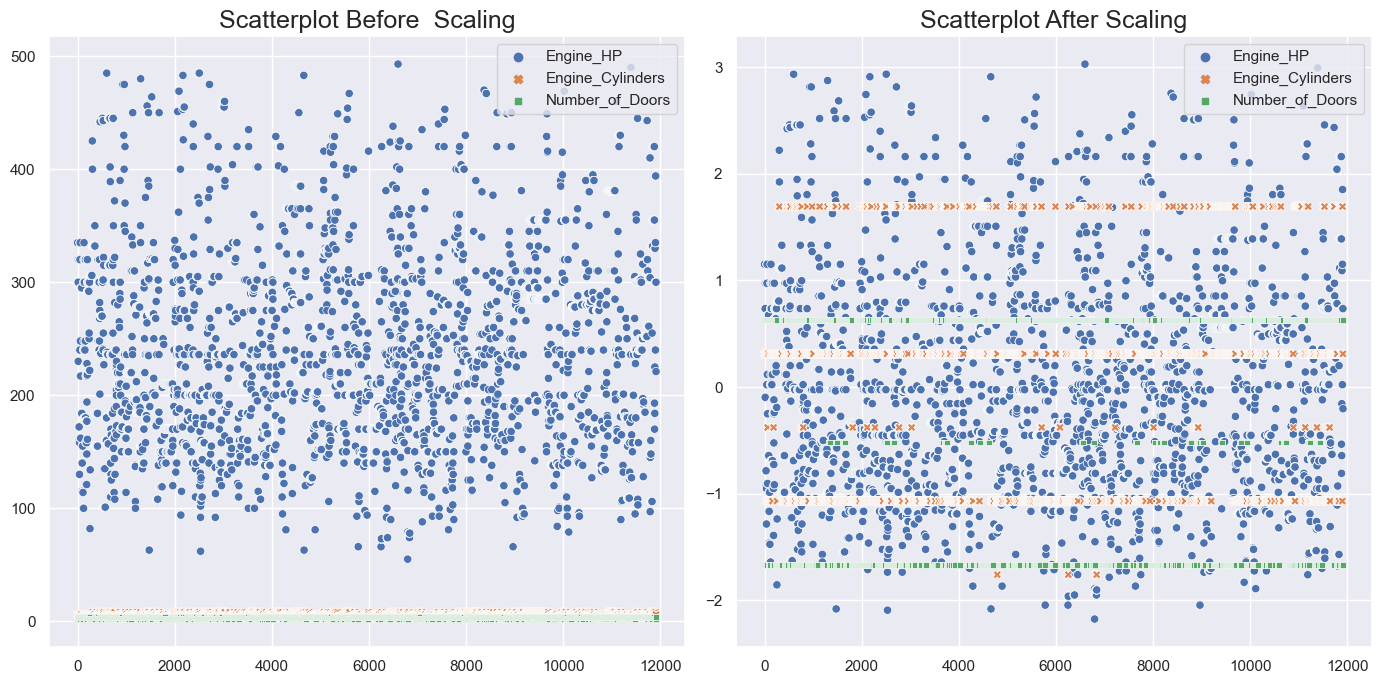

In [53]:
# plotting the scatterplot of before and after  Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before  Scaling", fontsize=18)
sns.scatterplot(data =data[['Engine_HP','Engine_Cylinders','Number_of_Doors']] , color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Scaling", fontsize=18)
sns.scatterplot(data = X[numeric_features], color="red")
plt.tight_layout()
plt.show()

In [54]:
#  mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

           Make  Engine_Fuel_Type  Engine_HP  Engine_Cylinders  Driven_Wheels  \
0      0.219945         -0.840876  -1.987931         -0.426749      -2.485714   
1      0.306437          1.277081   1.562493         -1.081341      -1.143565   
2      0.972509          0.177880  -1.229974         -2.335568      -0.108926   
3     -0.081679          0.561678  -1.008678          0.156883      -0.076157   
4     -1.666311          0.389849  -1.365603         -0.390926       0.625788   
...         ...               ...        ...               ...            ...   
11194 -0.955238         -1.049214   0.313862         -1.014933       1.894281   
11195  0.391434         -1.128864  -0.835933         -0.599472       1.413789   
11196  1.146660         -0.631287  -0.610372          1.075507      -1.567152   
11197  1.250662          0.603510  -1.217523         -0.300239      -0.738645   
11198  0.473145         -0.823837  -1.079533          1.191091       1.127350   

       Market_Category  Veh

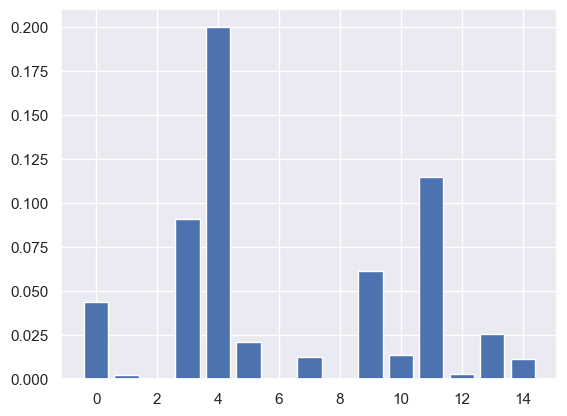

MAE: 0.079


In [55]:
X, y = make_regression(n_samples=11199, n_features=15, n_informative=10, noise=0.1, random_state=42)
selector = SelectKBest(mutual_info_regression,k=10)
selector.fit_transform(X,y)
X=pd.DataFrame(X)
X.columns = ['Make','Model','Year','Engine_Fuel_Type','Engine_HP','Engine_Cylinders','Transmission_Type','Driven_Wheels','Number_of_Doors','Market_Category','Vehicle_Size','Vehicle_Style','highway_MPG','city_mpg','Popularity']
selected_features_indices=selector.get_support(indices=True)
selected_features_names=X.columns[selected_features_indices]
X1=X[selected_features_names]
print(X1)

def select_features(X,y):
        # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X,y)
    # transform train input data
    X1 = fs.transform(X)    
    return X1,fs
X1,fs = select_features(X,y)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
# fit the model
model = LinearRegression()
model.fit(X1,y)
# evaluate the model
yhat = model.predict(X1)
# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('MAE: %.3f' % mae)

In [56]:
#Create the RFE object
X, y = make_regression(n_samples=11199, n_features=15, n_informative=10, noise=0.1, random_state=42)
model = LinearRegression()      
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe = rfe.fit(X,y)
X=pd.DataFrame(X)
X.columns = ['Make','Model','Year','Engine_Fuel_Type','Engine_HP','Engine_Cylinders','Transmission_Type','Driven_Wheels','Number_of_Doors','Market_Category','Vehicle_Size','Vehicle_Style','highway_MPG','city_mpg','Popularity']
X2 = X.columns[rfe.support_]
print('Chosen best  feature by rfe:',X2)
#Let’s calculate the accuracy score of the Random Forest classifier when we use only the 10 selected features:
X2 = rfe.transform(X)


Chosen best  feature by rfe: Index(['Make', 'Model', 'Engine_Fuel_Type', 'Engine_HP', 'Driven_Wheels',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'city_mpg',
       'Popularity'],
      dtype='object')


In [57]:
#splitting the data into train,test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,random_state = 42, test_size = 0.2 )

Choose Model

In [58]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [59]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Neural Network Regression ': MLPRegressor(random_state=0, alpha=1, max_iter=1000),
    'Lasso Regression ': Lasso(random_state=42),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10, max_features=1),
    'KNN Model ': KNeighborsRegressor(3),
    'Support Vector Machines (SVM)': SVR(gamma=2, C=1),
    'XGBRegressor': XGBRegressor(random_state=42)
}


In [60]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Neural Network Regression  trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
KNN Model  trained
Support Vector Machines (SVM) trained
XGBRegressor trained


In [61]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [62]:
for name,model in models.items():
    y_pred = model.predict(X_train)
    rmse = get_rmse(y_train,y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 0.10
Ridge Regression RMSE: 0.10
Neural Network Regression  RMSE: 0.13
Lasso Regression  RMSE: 3.15
Decision Tree Regression  RMSE: 97.96
Random Forest RMSE: 116.92
KNN Model  RMSE: 41.70
Support Vector Machines (SVM) RMSE: 160.40
XGBRegressor RMSE: 12.91


Conclusion -From above result ,we can clearly see that Ridge Regression is best model

In [63]:
from sklearn.metrics import mean_absolute_error
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)

MAE : 0.08058189148025849


In [64]:
y_test_pred

array([-108.66625647,   28.1251996 ,   40.35779384, ...,  258.16511643,
         32.687635  ,  161.31743923])

Hyperparameter Tuning using GridSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [66]:
params = {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

In [67]:
ridge = Ridge(random_state=42)

In [68]:
# Perform grid search cross-validation
grid_search = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg']},
             scoring='neg_mean_squared_error')

In [69]:
# Get the best parameter values
best_alpha = grid_search.best_params_['alpha']
best_solver = grid_search.best_params_['solver']

In [70]:
# Create a new Ridge regressor with the best parameters
best_ridge = Ridge(alpha=best_alpha, solver=best_solver)

In [71]:
# Fit the model with the best parameters on the entire training set
best_ridge.fit(X_train, y_train)
y_pred1=best_ridge.predict(X_train)
mae_pred = mean_absolute_error(y_train, y_pred1) 
print('MAE :',mae_pred)
print("Root Mean Absolute Error:" , np.sqrt(mae_pred))

MAE : 0.07956853048795483
Root Mean Absolute Error: 0.28207894371603637


In [72]:
# Get predictions of test set
y_test_pred1 = best_ridge.predict(X_test)
mae_pred1 = mean_absolute_error(y_test,y_test_pred1)
print('MAE :',mae_pred1)
print("Root Mean Absolute Error:" , np.sqrt(mae_pred1))

MAE : 0.0791042191294384
Root Mean Absolute Error: 0.2812547228571254


In [73]:
y_test_pred1

array([-108.6777421 ,   28.12758696,   40.3618072 , ...,  258.19075188,
         32.69130172,  161.33305501])